# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani
## Group 17

## Assignment 2 - Classification

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Mar 3, 2022
#### Modified: Mar 11, 2022

In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python


## 1. Getting Started

In [2]:
# Load dataset
df = pd.read_csv('datasets\heart_failure_dataset.csv', header=0)

In [3]:
## 1.1 Deceased patients (target) that had anaemia and were smokers (features)

df_d = df[df['death_event']==1] # Number of deceased patients
df_da = df_d[df_d['anaemia']==1] # Number of deceased patients with anemia
df_das = df_da[df_da['smoking']==1] # Number of deceased patients with anemia and were smokers

print('Percent of deceased patients that had anaemia and were smokers: %.1f%%' %(len(df_das)/len(df_d)*100))

Percent of deceased patients that had anaemia and were smokers: 12.5%


Mean CPK Levels of Alive Patients: 540
Mean CPK Levels of Dead Patients: 670


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0, 0.5, 'CPK Levels [mcg/L]')

<Figure size 432x288 with 0 Axes>

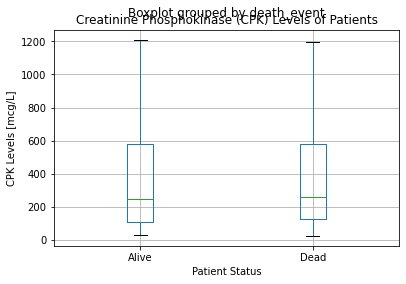

In [4]:
## 1.2a: Mean
df_a = df[df['death_event']==0]
df_CPK = df[['creatinine_phosphokinase', 'death_event']]
df_CPK['death_event'].replace({0:'Alive',1:'Dead'}, inplace=True)

CPK_mean = [df_a['creatinine_phosphokinase'].mean(), df_d['creatinine_phosphokinase'].mean()]
print('Mean CPK Levels of Alive Patients: %i'%CPK_mean[0])
print('Mean CPK Levels of Dead Patients: %i'%CPK_mean[1])

# Boxplot
plt.figure()
df_CPK.boxplot(by='death_event', showfliers=False)
plt.title('Creatinine Phosphokinase (CPK) Levels of Patients')
plt.xlabel('Patient Status')
plt.ylabel('CPK Levels [mcg/L]')

In [5]:
## 1.2b: T-test
from scipy.stats import ttest_ind
T, P = ttest_ind(df_a['creatinine_phosphokinase'],df_d['creatinine_phosphokinase'])

print("p-value =", P)
# if the p-value is less than 0.05 we have significant different between feature values
if P < 0.05:
    print("significant")
else:
    print("not significant")


p-value = 0.27961124573614
not significant


## 2. Logistic Regression

In [6]:
## Splitting data into 80/20 training/test split

# Split features and targets: F=Features, T=Targets
F = df.iloc[:, :-1]
T = df['death_event']

# Splitting dataset into training and test sets
from sklearn.model_selection import train_test_split
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.2)

In [7]:
## 2.1 Model Training

# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiating the model (using the default parameters)
lr = LogisticRegression()

# Fitting the model with data
lr.fit(F_train,T_train)

# Save the Trained Model
pickle.dump(lr, open('Model_LogRegress.pkl', 'wb'))

# Predicting the labels on data set
Tp_train_lr = lr.predict(F_train)
Tp_test_lr = lr.predict(F_test) 

Confusion Matrix
 [[148  12]
 [ 48  31]]
Accuracy: 0.7489539748953975
Precision: 0.7209302325581395
Recall: 0.3924050632911392
F1 Score: 0.5081967213114754


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


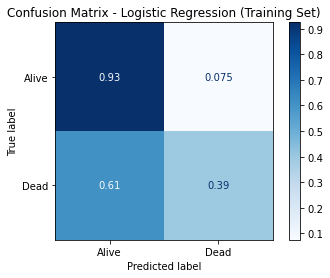

In [8]:
## 2.2 Model Evaluation - Training Set

# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm_train_lr = confusion_matrix(T_train, Tp_train_lr)
print('Confusion Matrix\n', cm_train_lr)

plt_cm_train_lr = plot_confusion_matrix(lr, F_train, T_train,
                                       display_labels=['Alive','Dead'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cm_train_lr.ax_.set_title('Confusion Matrix - Logistic Regression (Training Set)')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(T_train, Tp_train_lr))
print("Precision:",precision_score(T_train, Tp_train_lr))
print("Recall:",recall_score(T_train, Tp_train_lr))
print("F1 Score:",f1_score(T_train, Tp_train_lr))

Confusion Matrix
 [[40  3]
 [10  7]]
Accuracy: 0.7833333333333333
Precision: 0.7
Recall: 0.4117647058823529
F1 Score: 0.5185185185185185


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


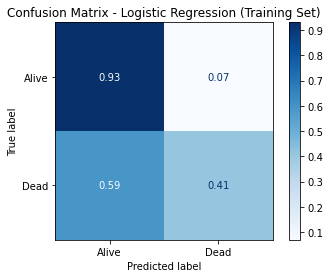

In [9]:
## 2.2 Model Evaluation - Test Set

cm_test_lr = confusion_matrix(T_test, Tp_test_lr)
print('Confusion Matrix\n', cm_test_lr)

plt_cm_test_lr = plot_confusion_matrix(lr, F_test, T_test,
                                       display_labels=['Alive','Dead'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cm_test_lr.ax_.set_title('Confusion Matrix - Logistic Regression (Training Set)')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(T_test, Tp_test_lr))
print("Precision:",precision_score(T_test, Tp_test_lr))
print("Recall:",recall_score(T_test, Tp_test_lr))
print("F1 Score:",f1_score(T_test, Tp_test_lr))

# 3. K-Nearest Neighbor

In [10]:
## 3.1 Model Training
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Model creation and training (using the default parameters)
knn, Tp_train_knn, Tp_test_knn = [], [], []


for i in range(10):
    knn.append(KNeighborsClassifier(n_neighbors=(i+1)))
    knn[i].fit(F_train,T_train)
    Tp_train_knn.append(knn[i].predict(F_train))
    Tp_test_knn.append(knn[i].predict(F_test))

In [11]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report

# Print the Classification Report and Confusion Matrix
def classifier_performance(model,T,F,Tp,title,label):
    print('Classification Report', title, '\n', classification_report(T,Tp,target_names=label))
    
#     print("Accuracy:",accuracy_score(T, Tp))
#     print("Precision:",precision_score(T, Tp))
#     print("Recall:",recall_score(T, Tp))
#     print("F1 Score:",f1_score(T, Tp))
    
    # Plot normalized confusion matrix
    titles_options = [("Confusion Matrix %s" %title, None),
                      ("Normalized Confusion Matrix %s" %title, 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, F, T,
                                     display_labels=label,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

Classification Report (K = 1) 
               precision    recall  f1-score   support

       Alive       1.00      1.00      1.00       160
        Dead       1.00      1.00      1.00        79

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Confusion Matrix (K = 1)
[[160   0]
 [  0  79]]
Normalized Confusion Matrix (K = 1)
[[1. 0.]
 [0. 1.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


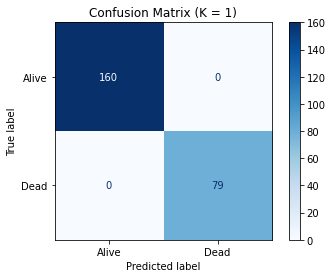

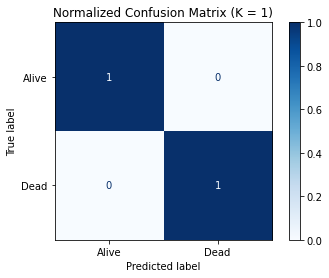

Classification Report (K = 2) 
               precision    recall  f1-score   support

       Alive       0.74      1.00      0.85       160
        Dead       1.00      0.29      0.45        79

    accuracy                           0.77       239
   macro avg       0.87      0.65      0.65       239
weighted avg       0.83      0.77      0.72       239

Confusion Matrix (K = 2)
[[160   0]
 [ 56  23]]
Normalized Confusion Matrix (K = 2)
[[1.         0.        ]
 [0.70886076 0.29113924]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


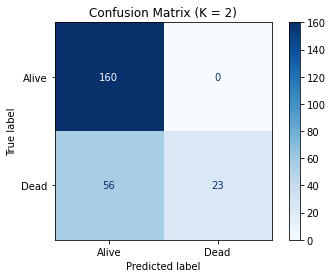

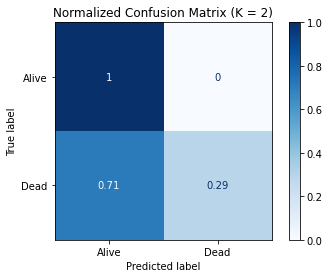

Classification Report (K = 3) 
               precision    recall  f1-score   support

       Alive       0.78      0.90      0.84       160
        Dead       0.71      0.49      0.58        79

    accuracy                           0.77       239
   macro avg       0.75      0.70      0.71       239
weighted avg       0.76      0.77      0.75       239

Confusion Matrix (K = 3)
[[144  16]
 [ 40  39]]
Normalized Confusion Matrix (K = 3)
[[0.9        0.1       ]
 [0.50632911 0.49367089]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


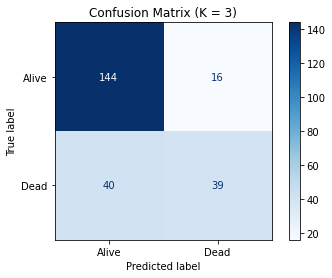

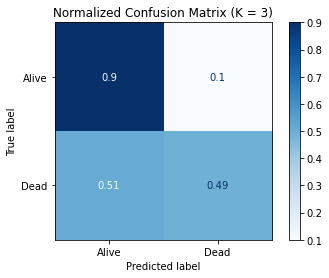

Classification Report (K = 4) 
               precision    recall  f1-score   support

       Alive       0.70      0.98      0.82       160
        Dead       0.79      0.14      0.24        79

    accuracy                           0.70       239
   macro avg       0.74      0.56      0.53       239
weighted avg       0.73      0.70      0.62       239

Confusion Matrix (K = 4)
[[157   3]
 [ 68  11]]
Normalized Confusion Matrix (K = 4)
[[0.98125    0.01875   ]
 [0.86075949 0.13924051]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


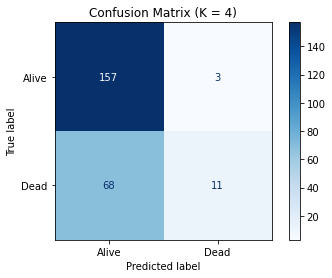

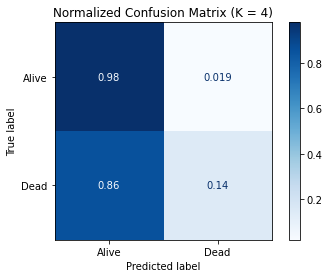

Classification Report (K = 5) 
               precision    recall  f1-score   support

       Alive       0.74      0.91      0.81       160
        Dead       0.65      0.35      0.46        79

    accuracy                           0.72       239
   macro avg       0.70      0.63      0.64       239
weighted avg       0.71      0.72      0.70       239

Confusion Matrix (K = 5)
[[145  15]
 [ 51  28]]
Normalized Confusion Matrix (K = 5)
[[0.90625    0.09375   ]
 [0.64556962 0.35443038]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


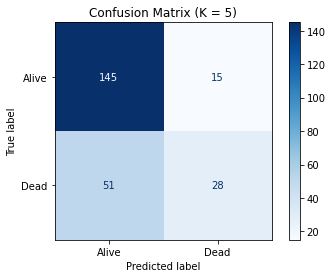

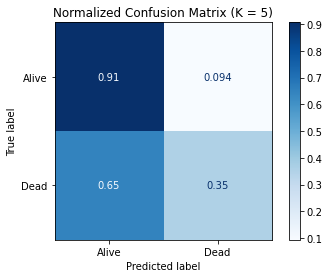

Classification Report (K = 6) 
               precision    recall  f1-score   support

       Alive       0.71      0.96      0.81       160
        Dead       0.68      0.19      0.30        79

    accuracy                           0.70       239
   macro avg       0.69      0.57      0.55       239
weighted avg       0.70      0.70      0.64       239

Confusion Matrix (K = 6)
[[153   7]
 [ 64  15]]
Normalized Confusion Matrix (K = 6)
[[0.95625    0.04375   ]
 [0.81012658 0.18987342]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


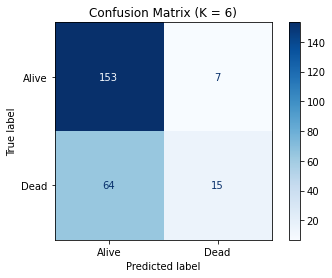

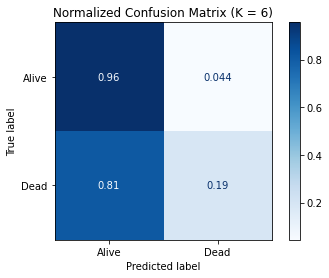

Classification Report (K = 7) 
               precision    recall  f1-score   support

       Alive       0.72      0.93      0.81       160
        Dead       0.65      0.28      0.39        79

    accuracy                           0.71       239
   macro avg       0.68      0.60      0.60       239
weighted avg       0.70      0.71      0.67       239

Confusion Matrix (K = 7)
[[148  12]
 [ 57  22]]
Normalized Confusion Matrix (K = 7)
[[0.925      0.075     ]
 [0.72151899 0.27848101]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


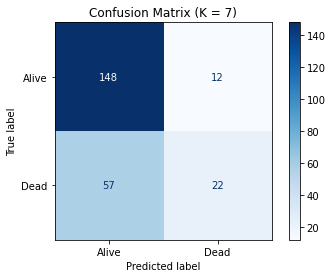

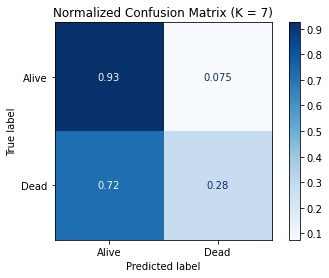

Classification Report (K = 8) 
               precision    recall  f1-score   support

       Alive       0.70      0.97      0.81       160
        Dead       0.75      0.15      0.25        79

    accuracy                           0.70       239
   macro avg       0.72      0.56      0.53       239
weighted avg       0.72      0.70      0.63       239

Confusion Matrix (K = 8)
[[156   4]
 [ 67  12]]
Normalized Confusion Matrix (K = 8)
[[0.975      0.025     ]
 [0.84810127 0.15189873]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


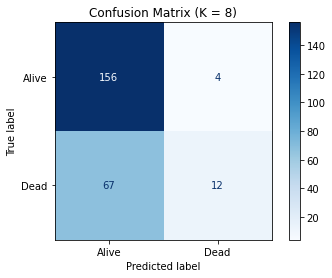

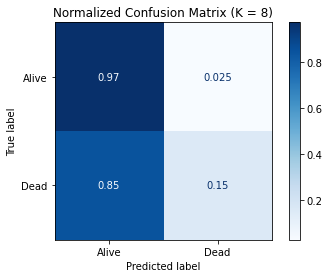

Classification Report (K = 9) 
               precision    recall  f1-score   support

       Alive       0.71      0.91      0.80       160
        Dead       0.56      0.23      0.32        79

    accuracy                           0.69       239
   macro avg       0.63      0.57      0.56       239
weighted avg       0.66      0.69      0.64       239

Confusion Matrix (K = 9)
[[146  14]
 [ 61  18]]
Normalized Confusion Matrix (K = 9)
[[0.9125    0.0875   ]
 [0.7721519 0.2278481]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


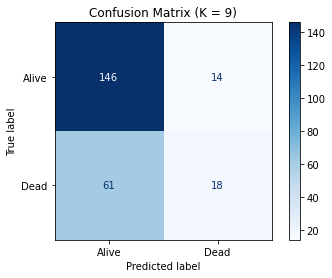

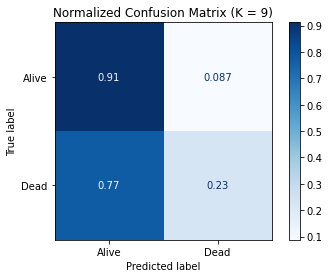

Classification Report (K = 10) 
               precision    recall  f1-score   support

       Alive       0.68      0.95      0.79       160
        Dead       0.47      0.09      0.15        79

    accuracy                           0.67       239
   macro avg       0.57      0.52      0.47       239
weighted avg       0.61      0.67      0.58       239

Confusion Matrix (K = 10)
[[152   8]
 [ 72   7]]
Normalized Confusion Matrix (K = 10)
[[0.95       0.05      ]
 [0.91139241 0.08860759]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


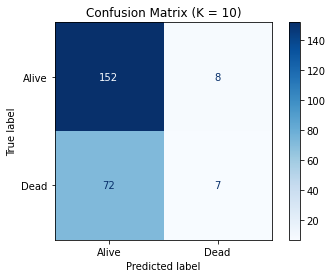

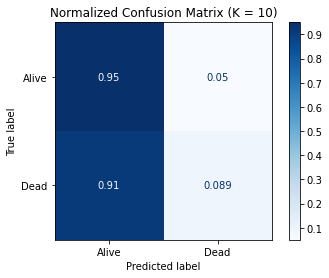

In [12]:
## 3.2 Model Evaluation - Training Set
label_bc = ['Alive','Dead']
k_value = [1,2,3,4,5,6,7,8,9,10]
accuracy_train = []

for i in range(10):
    title_bc = '(K = %i)' %k_value[i]
    
    classifier_performance(knn[i], T_train, F_train, Tp_train_knn[i], title_bc, label_bc)
    
    accuracy_train.append(accuracy_score(T_train, Tp_train_knn[i])*100)

Classification Report (K = 1) 
               precision    recall  f1-score   support

       Alive       0.74      0.67      0.71        43
        Dead       0.33      0.41      0.37        17

    accuracy                           0.60        60
   macro avg       0.54      0.54      0.54        60
weighted avg       0.63      0.60      0.61        60

Confusion Matrix (K = 1)
[[29 14]
 [10  7]]
Normalized Confusion Matrix (K = 1)
[[0.6744186  0.3255814 ]
 [0.58823529 0.41176471]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


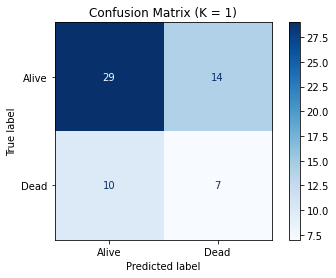

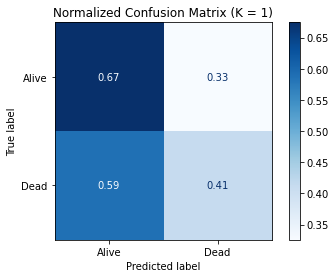

Classification Report (K = 2) 
               precision    recall  f1-score   support

       Alive       0.72      0.91      0.80        43
        Dead       0.33      0.12      0.17        17

    accuracy                           0.68        60
   macro avg       0.53      0.51      0.49        60
weighted avg       0.61      0.68      0.63        60

Confusion Matrix (K = 2)
[[39  4]
 [15  2]]
Normalized Confusion Matrix (K = 2)
[[0.90697674 0.09302326]
 [0.88235294 0.11764706]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


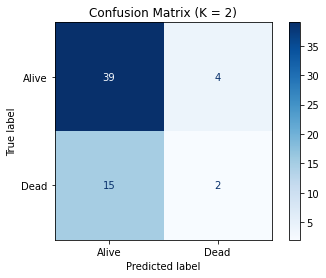

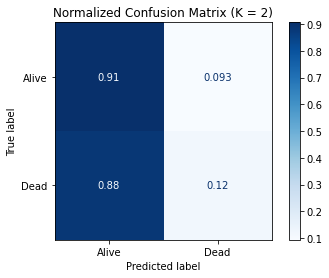

Classification Report (K = 3) 
               precision    recall  f1-score   support

       Alive       0.78      0.84      0.81        43
        Dead       0.50      0.41      0.45        17

    accuracy                           0.72        60
   macro avg       0.64      0.62      0.63        60
weighted avg       0.70      0.72      0.71        60

Confusion Matrix (K = 3)
[[36  7]
 [10  7]]
Normalized Confusion Matrix (K = 3)
[[0.8372093  0.1627907 ]
 [0.58823529 0.41176471]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


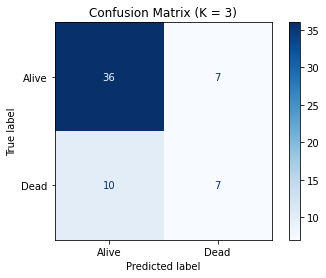

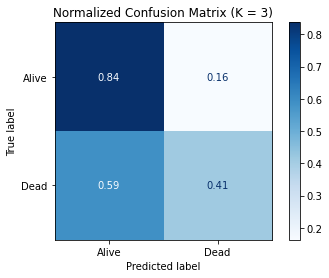

Classification Report (K = 4) 
               precision    recall  f1-score   support

       Alive       0.75      0.98      0.85        43
        Dead       0.75      0.18      0.29        17

    accuracy                           0.75        60
   macro avg       0.75      0.58      0.57        60
weighted avg       0.75      0.75      0.69        60

Confusion Matrix (K = 4)
[[42  1]
 [14  3]]
Normalized Confusion Matrix (K = 4)
[[0.97674419 0.02325581]
 [0.82352941 0.17647059]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


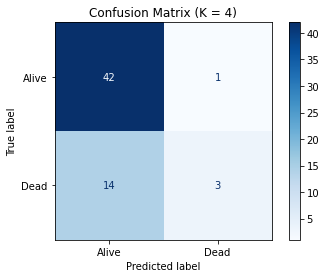

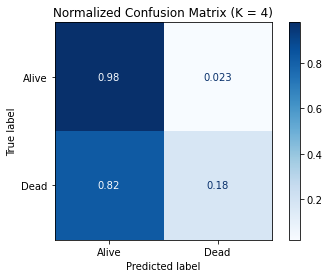

Classification Report (K = 5) 
               precision    recall  f1-score   support

       Alive       0.73      0.88      0.80        43
        Dead       0.38      0.18      0.24        17

    accuracy                           0.68        60
   macro avg       0.55      0.53      0.52        60
weighted avg       0.63      0.68      0.64        60

Confusion Matrix (K = 5)
[[38  5]
 [14  3]]
Normalized Confusion Matrix (K = 5)
[[0.88372093 0.11627907]
 [0.82352941 0.17647059]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


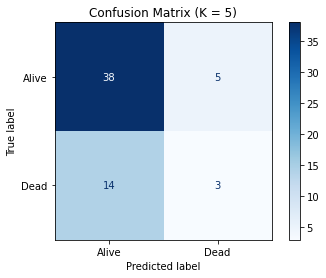

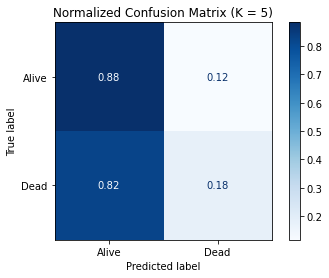

Classification Report (K = 6) 
               precision    recall  f1-score   support

       Alive       0.75      0.98      0.85        43
        Dead       0.75      0.18      0.29        17

    accuracy                           0.75        60
   macro avg       0.75      0.58      0.57        60
weighted avg       0.75      0.75      0.69        60

Confusion Matrix (K = 6)
[[42  1]
 [14  3]]
Normalized Confusion Matrix (K = 6)
[[0.97674419 0.02325581]
 [0.82352941 0.17647059]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


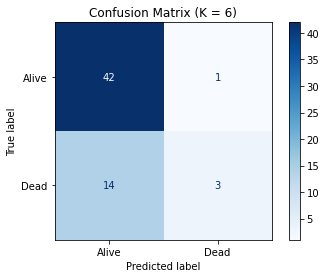

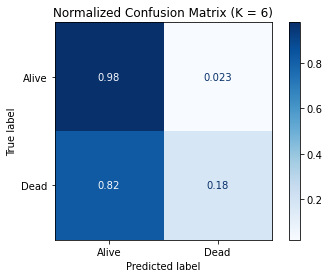

Classification Report (K = 7) 
               precision    recall  f1-score   support

       Alive       0.75      0.95      0.84        43
        Dead       0.60      0.18      0.27        17

    accuracy                           0.73        60
   macro avg       0.67      0.56      0.55        60
weighted avg       0.70      0.73      0.68        60

Confusion Matrix (K = 7)
[[41  2]
 [14  3]]
Normalized Confusion Matrix (K = 7)
[[0.95348837 0.04651163]
 [0.82352941 0.17647059]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


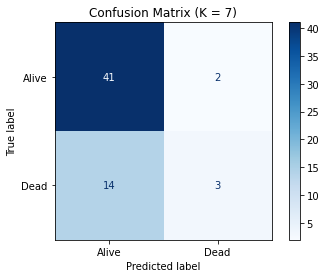

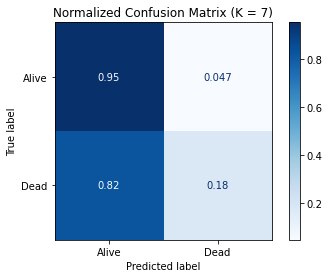

Classification Report (K = 8) 
               precision    recall  f1-score   support

       Alive       0.72      0.95      0.82        43
        Dead       0.33      0.06      0.10        17

    accuracy                           0.70        60
   macro avg       0.53      0.51      0.46        60
weighted avg       0.61      0.70      0.62        60

Confusion Matrix (K = 8)
[[41  2]
 [16  1]]
Normalized Confusion Matrix (K = 8)
[[0.95348837 0.04651163]
 [0.94117647 0.05882353]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


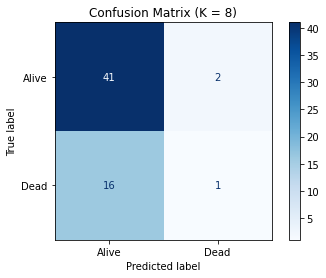

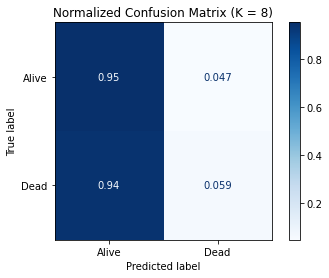

Classification Report (K = 9) 
               precision    recall  f1-score   support

       Alive       0.71      0.91      0.80        43
        Dead       0.20      0.06      0.09        17

    accuracy                           0.67        60
   macro avg       0.45      0.48      0.44        60
weighted avg       0.56      0.67      0.60        60



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix (K = 9)
[[39  4]
 [16  1]]
Normalized Confusion Matrix (K = 9)
[[0.90697674 0.09302326]
 [0.94117647 0.05882353]]


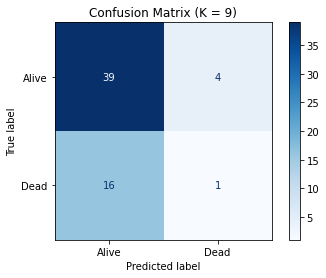

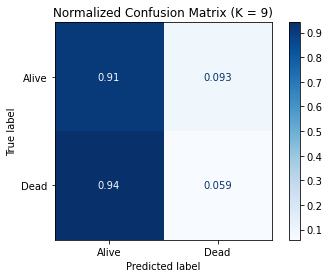

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report (K = 10) 
               precision    recall  f1-score   support

       Alive       0.72      0.98      0.83        43
        Dead       0.50      0.06      0.11        17

    accuracy                           0.72        60
   macro avg       0.61      0.52      0.47        60
weighted avg       0.66      0.72      0.63        60

Confusion Matrix (K = 10)
[[42  1]
 [16  1]]
Normalized Confusion Matrix (K = 10)
[[0.97674419 0.02325581]
 [0.94117647 0.05882353]]


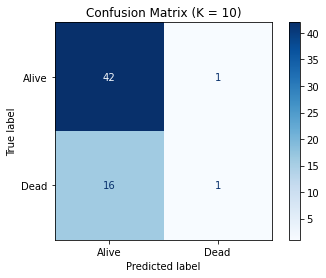

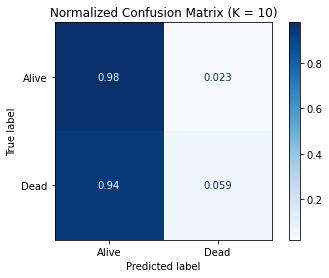

In [13]:
## 3.2 Model Evaluation - Test Set
accuracy_test = []

for i in range(10):
    title_bc = '(K = %i)' %k_value[i]
    
    classifier_performance(knn[i],T_test, F_test, Tp_test_knn[i], title_bc, label_bc)
    accuracy_test.append(accuracy_score(T_test, Tp_test_knn[i])*100)

Text(0, 0.5, 'Accuracy (%)')

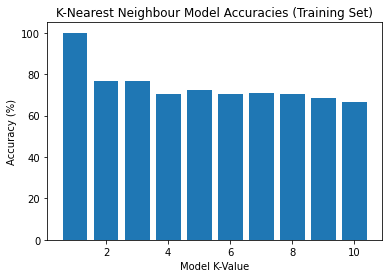

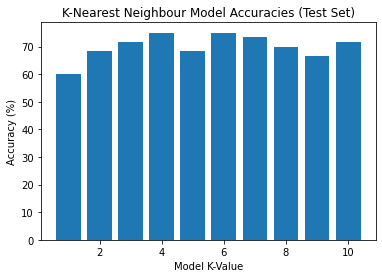

In [14]:
## 3.3 Accuracy Plotting
# Training Set
plt.figure(1)
plt.bar(k_value, accuracy_train)
plt.title('K-Nearest Neighbour Model Accuracies (Training Set)')
plt.xlabel('Model K-Value')
plt.ylabel('Accuracy (%)')

# Test Set
plt.figure(2)
plt.bar(k_value, accuracy_test)
plt.title('K-Nearest Neighbour Model Accuracies (Test Set)')
plt.xlabel('Model K-Value')
plt.ylabel('Accuracy (%)')

# 4. Feature Extraction

In [15]:
## 4.1 Data Import
from scipy.io import loadmat 
from tslearn.metrics import dtw

# a_list = list(range(0, len(normal_beats)))
normal_beats = loadmat('datasets/multi_class/NORMAL_BEATS.mat')['NORMAL_BEATS']
normal = loadmat('datasets/multi_class/NORMAL.mat')['NORMAL']

apc_beats = loadmat('datasets/multi_class/APC_BEATS.mat')['APC_BEATS']
apc = loadmat('datasets/multi_class/APC.mat')['APC']

pvc_beats = loadmat('datasets/multi_class/PVC_BEATS.mat')['PVC_BEATS']
pvc = loadmat('datasets/multi_class/PVC.mat')['PVC']

lbbb_beats = loadmat('datasets/multi_class/LBBB_BEATS.mat')['LBBB_BEATS']
lbbb = loadmat('datasets/multi_class/LBBB.mat')['LBBB']

rbbb_beats = loadmat('datasets/multi_class/RBBB_BEATS.mat')['RBBB_BEATS']
rbbb = loadmat('datasets/multi_class/RBBB.mat')['RBBB']

In [16]:
## 4.2 - Dataframe Dreation 
beats = [apc_beats, lbbb_beats, normal_beats, pvc_beats, rbbb_beats]
ground = [apc, lbbb, normal, pvc, rbbb]
label = ['F1','F2','F3','F4','F5','Class']

# Function that creates dataframe comparing beat type with all ground truths
def beat_dtw(classification):
    beat_dtw = pd.DataFrame()
    temp_dtw = []

    for i in range(len(beats)):
        for j in range(len(beats[classification][0])):
            temp_dtw.append(dtw(ground[i], beats[classification][:,j]))

        beat_dtw[label[i]] = temp_dtw
        temp_dtw = []

    temp_class = [classification]*2000
    beat_dtw['Class'] = temp_class
    
    return beat_dtw

In [17]:
# Collating all the beat dataframes
dtw_apc = dtw_lbbb = dtw_normal = dtw_pvc = dtw_rbbb = None 

list_dtw = [dtw_apc, dtw_lbbb, dtw_normal, dtw_pvc, dtw_rbbb]

for i in range(len(list_dtw)): 
    list_dtw[i] = beat_dtw(i)
    
df_dtw = pd.concat(list_dtw)

# 5. Multi-Class Evaluaton

In [18]:
## Splitting data into 80/20 training/test split

# Split features and targets: F=Features, T=Targets
F_mc = df_dtw.iloc[:, :-1]
T_mc = df_dtw['Class']

# Splitting dataset into training and test sets
from sklearn.model_selection import train_test_split
F_train_mc, F_test_mc, T_train_mc, T_test_mc = train_test_split(F_mc, T_mc, test_size=0.2)

In [19]:
## 5.1 - Model Creation
# a. KNN
mc_knn = KNeighborsClassifier(n_neighbors=5)

# b. Decision Tree
from sklearn.tree import DecisionTreeClassifier
mc_dt = DecisionTreeClassifier()

#c. Gaussian Naive Bayes# Import the class
from sklearn.naive_bayes import GaussianNB
mc_gnb = GaussianNB()

# d.Support Vector Machine
from sklearn.svm import SVC
mc_svm = SVC()

# Model training and prediction
mc_models = [mc_knn, mc_dt, mc_gnb, mc_svm]
Tp_mc = []

for i in range(len(mc_models)):
    mc_models[i].fit(F_train_mc, T_train_mc)
    Tp_mc.append(mc_models[i].predict(F_test_mc))

Classification Report (K-Nearest Neighbour) 
               precision    recall  f1-score   support

         APC       0.92      0.92      0.92       410
        LBBB       0.94      0.95      0.94       414
      NORMAL       0.90      0.91      0.91       381
         PVC       0.93      0.92      0.93       393
        RBBB       0.96      0.95      0.96       402

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Confusion Matrix (K-Nearest Neighbour)
[[379   1  22   2   6]
 [  2 392   7  13   0]
 [ 14   4 348  10   5]
 [  2  17   8 363   3]
 [ 14   3   2   1 382]]
Normalized Confusion Matrix (K-Nearest Neighbour)
[[0.92439024 0.00243902 0.05365854 0.00487805 0.01463415]
 [0.00483092 0.9468599  0.01690821 0.03140097 0.        ]
 [0.03674541 0.01049869 0.91338583 0.02624672 0.01312336]
 [0.00508906 0.043257   0.02035623 0.92366412 0.00763359]
 [0.03482587 0.00746269 0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


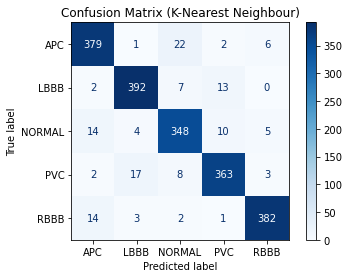

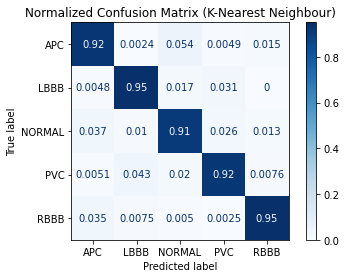

Classification Report (Decision Tree) 
               precision    recall  f1-score   support

         APC       0.84      0.87      0.85       410
        LBBB       0.93      0.89      0.91       414
      NORMAL       0.82      0.83      0.83       381
         PVC       0.88      0.91      0.89       393
        RBBB       0.95      0.92      0.93       402

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000

Confusion Matrix (Decision Tree)
[[355   4  35   4  12]
 [  6 370  14  23   1]
 [ 34   7 317  18   5]
 [  6  15  13 357   2]
 [ 20   1   7   4 370]]
Normalized Confusion Matrix (Decision Tree)
[[0.86585366 0.0097561  0.08536585 0.0097561  0.02926829]
 [0.01449275 0.89371981 0.03381643 0.05555556 0.00241546]
 [0.08923885 0.0183727  0.832021   0.04724409 0.01312336]
 [0.01526718 0.03816794 0.03307888 0.90839695 0.00508906]
 [0.04975124 0.00248756 0.01741294 0.00995025 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


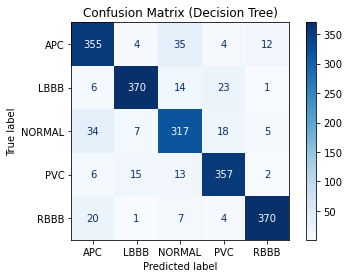

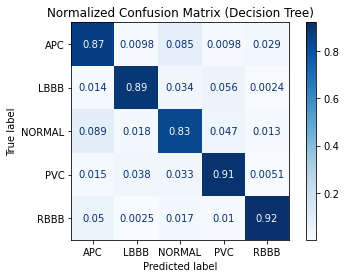

Classification Report (Gaussian Naive Bayes) 
               precision    recall  f1-score   support

         APC       0.45      0.23      0.30       410
        LBBB       0.75      0.51      0.60       414
      NORMAL       0.61      0.60      0.60       381
         PVC       0.62      0.78      0.69       393
        RBBB       0.57      0.91      0.70       402

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.58      2000
weighted avg       0.60      0.60      0.58      2000

Confusion Matrix (Gaussian Naive Bayes)
[[ 94   1  21  37 257]
 [ 17 210  87 100   0]
 [ 74  12 227  46  22]
 [  5  58  24 305   1]
 [ 21   0  13   1 367]]
Normalized Confusion Matrix (Gaussian Naive Bayes)
[[0.22926829 0.00243902 0.05121951 0.0902439  0.62682927]
 [0.0410628  0.50724638 0.21014493 0.24154589 0.        ]
 [0.19422572 0.03149606 0.59580052 0.12073491 0.05774278]
 [0.01272265 0.1475827  0.0610687  0.77608142 0.00254453]
 [0.05223881 0.         0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


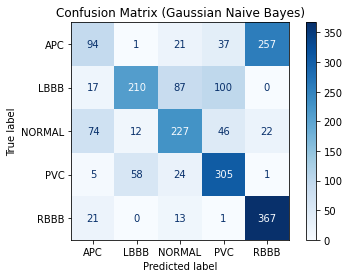

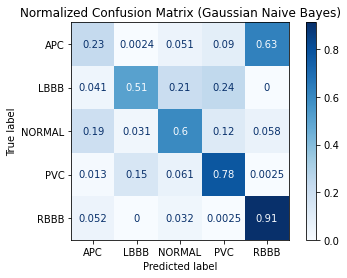

Classification Report (Support Vector Machine) 
               precision    recall  f1-score   support

         APC       0.71      0.90      0.80       410
        LBBB       0.90      0.91      0.90       414
      NORMAL       0.84      0.80      0.82       381
         PVC       0.89      0.90      0.90       393
        RBBB       0.97      0.73      0.83       402

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix (Support Vector Machine)
[[368   1  34   3   4]
 [  1 377  13  22   1]
 [ 42  15 304  17   3]
 [  2  25   9 355   2]
 [102   3   2   0 295]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix (Support Vector Machine)
[[0.89756098 0.00243902 0.08292683 0.00731707 0.0097561 ]
 [0.00241546 0.91062802 0.03140097 0.0531401  0.00241546]
 [0.11023622 0.03937008 0.79790026 0.04461942 0.00787402]
 [0.00508906 0.06361323 0.02290076 0.90330789 0.00508906]
 [0.25373134 0.00746269 0.00497512 0.         0.73383085]]


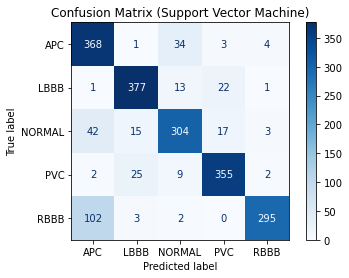

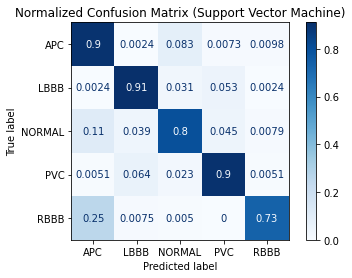

In [20]:
## 5.2 Model Evaluation
label_mc = ['APC', 'LBBB', 'NORMAL', 'PVC', 'RBBB']
title_mc = ['(K-Nearest Neighbour)', '(Decision Tree)', '(Gaussian Naive Bayes)', '(Support Vector Machine)']

for i in range(len(mc_models)):
    classifier_performance(mc_models[i], T_test_mc, F_test_mc, Tp_mc[i], title_mc[i], label_mc)

# 6. Raspberry Pi

In [24]:
## Saving KNN model with highest accurracy (test set, k = 9)
#max_value = accuracy_test.index(max(accuracy_test))
pickle.dump(knn[8], open('knn.pkl', 'wb'))